In [1]:
import tushare as ts
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 获取宏观经济数据
Tushare 包可以获取宏观经济数据、股票交易数据、基本面数据（公司盈利能力、业绩报告等）、新闻时间、银行间同业拆放利率等。

In [2]:
cpis = ts.get_cpi()
print(cpis.head(10))

     month     cpi
0  2018.12  101.90
1  2018.11  102.18
2  2018.10  102.54
3   2018.9  102.50
4   2018.8  102.30
5   2018.7  102.10
6   2018.6  101.85
7   2018.5  101.75
8   2018.4  101.80
9   2018.3  102.06


In [3]:
cpis_sorted = cpis.sort_values('month') # 根据时间顺序排(升序)
cpis_sorted['cpi'] = cpis_sorted['cpi'] - 100.0 # 转化成百分比数据
cpis_sorted.to_csv('cpis.csv') # 保存

Text(0.5,1,'CPI月度同比')

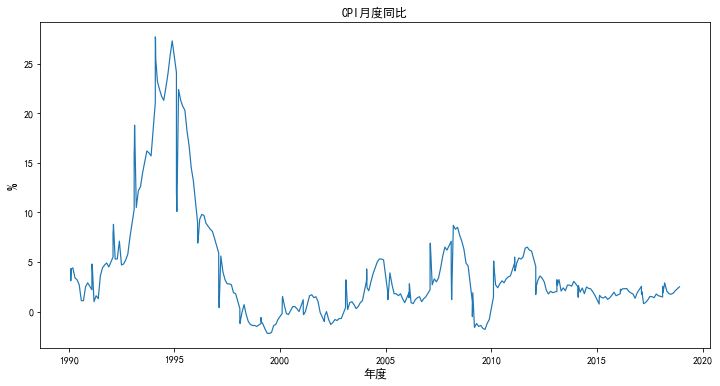

In [4]:
df = pd.read_csv('cpis.csv')
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['SimHei'] # 设置识别中文字体
#设置图形大小
plt.figure(figsize=(12,6))
plt.plot(df['month'], df['cpi'], linewidth=1.2)
plt.axis('tight')
plt.xlabel('年度', size=12)
plt.ylabel('%', size=15)
plt.title('CPI月度同比', size=12)

从上图可以看出，93、94年出现超20%的高通胀膨胀。

# 货币供应量分析
根据货币金融学和央行实践，整个经济体系的货币供应大致可分为M0、M1、M2和M3。  
M0: 居民持有的货币(即市场上流通的货币)  
M1: 居民持有的货币 + 银行客户的活期存款。M1又称为狭义货币供应量。  
M2: M1 + 银行客户的储蓄及定期存款，以及由银行的可转让存款证（由非银行持有），又称为广义货币供应量。  
M3: M2 + 有限制牌照银行及接受存款公司的客户存款，及由上述机构发行的存款证（由非银行持有）。  

从M1与M2的定义可见，两者的差异只在于M1不包括储蓄存款和定期存款，因此M1与M2增幅的差异，应由储蓄存款和定期存款变动引起。M1反映居民和企业资金松紧变化，是经济周期波动的先行指标，流动性仅次于M0；M2流动性偏弱，但反映的是社会总需求的变化和未来通货膨胀的压力状况，通常所说的货币供应量，主要指M2。

In [5]:
money_supply = ts.get_money_supply()
money_supply.head()

,month,m2,m2_yoy,m1,m1_yoy,m0,m0_yoy,cd,cd_yoy,qm,qm_yoy,ftd,ftd_yoy,sd,sd_yoy,rests,rests_yoy
0,2018.11,1813175.07,8.00,543498.66,1.50,70563.30,2.80,472935.36,--,1269676.40,--,342190.73,--,710236.37,--,217249.31,--
1,2018.10,1795561.60,8.00,540128.37,2.70,70106.62,2.80,470021.74,--,1255433.23,--,340815.59,--,702827.46,--,211790.18,--
2,2018.9,1801665.58,8.30,538574.08,4.00,71254.26,2.20,467319.82,--,1263091.50,--,349826.79,--,706256.25,--,207008.46,--
3,2018.8,1788670.43,8.20,538324.64,3.90,69775.39,3.30,468549.25,--,1250345.79,--,341834.17,--,692847.93,--,215663.69,--
4,2018.7,1776196.11,8.50,536624.29,5.10,69530.59,3.60,467093.70,--,1239571.81,--,335935.49,--,689397.13,--,214239.19,--


其中,  
month: 统计时间  
m2: 货币和准货币（广义货币M2）（亿元）  
m2_yoy: 货币和准货币（广义货币M2）同比增长（%）  
m1: 货币（狭义货币M1）（亿元）  
m1_yoy: 货币(狭义货币M1)同比增长（%）  
m0: 流通中现金（M0）（亿元）  
m0_yoy: 流通中现金（M0）同比增长（%）  

In [6]:
# 删除m2_yoy缺失值，或者取出连续不缺失的观测值
money_supply_sorted = money_supply.sort_values('month').iloc[228:]
money_supply_sorted.to_csv("money-supply.csv")
money_supply_sorted.head()

,month,m2,m2_yoy,m1,m1_yoy,m0,m0_yoy,cd,cd_yoy,qm,qm_yoy,ftd,ftd_yoy,sd,sd_yoy,rests,rests_yoy
262,1997.1,78648.00,34.67,30573.00,21.35,11493.00,33.64,--,--,--,--,--,--,--,--,--,--
253,1997.10,86644.00,18.44,32422.00,20.99,9489.00,12.90,--,--,--,--,--,--,--,--,--,--
252,1997.11,87590.00,18.14,32909.00,20.01,9784.58,12.40,--,--,--,--,--,--,--,--,--,--
251,1997.12,90995.30,19.60,34826.30,22.10,10177.60,15.60,24648.70,25.00,56169.00,18.10,6738.50,33.70,46279.80,20.10,3150.70,-21.60
261,1997.2,78998.00,23.86,29103.00,15.23,10080.00,8.38,--,--,--,--,--,--,--,--,--,--


In [7]:
# 由于时间记录有点问题，使用pandas的date重新定义时间
date = pd.date_range('1997-1-1', periods=len(money_supply_sorted), freq='M')
df = pd.read_csv('money-supply.csv')
df.index = date
# 只保留m2_yoy m1_yoy m0_yoy 即M2、M1、M0的月度同比增长率
df = df.iloc[:,2:8]
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['SimHei'] # 设置识别中文字体
df.rename(columns={'m2_yoy': 'M2增长率', 'm1_yoy': 'M1增长率', 'm0_yoy': 'M0增长率'}, inplace=True)
df.head()

,m2,M2增长率,m1,M1增长率,m0,M0增长率
1997-01-31,78648.0,34.67,30573.0,21.35,11493.00,33.64
1997-02-28,86644.0,18.44,32422.0,20.99,9489.00,12.90
1997-03-31,87590.0,18.14,32909.0,20.01,9784.58,12.40
1997-04-30,90995.3,19.60,34826.3,22.10,10177.60,15.60
1997-05-31,78998.0,23.86,29103.0,15.23,10080.00,8.38


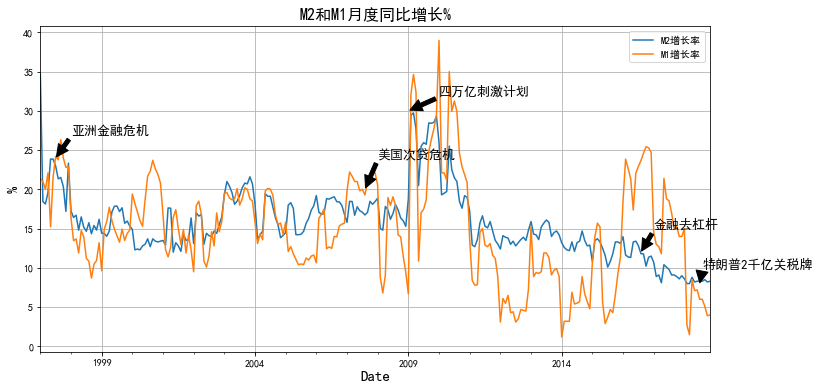

In [17]:
df[['M2增长率', 'M1增长率']].plot(figsize=(12, 6))
plt.xlabel('Date', size=15)
plt.ylabel('%', size=15)
plt.title('M2和M1月度同比增长%', size=16)
plt.annotate('亚洲金融危机', size=13, xy=('1997-7-1', 24),
            xytext=('1998-1-1', 27), arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate('美国次贷危机', size=13, xy=('2007-8-1', 20),
            xytext=('2008-1-1', 24), arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate('四万亿刺激计划', size=13, xy=('2009-1-1', 30),
            xytext=('2010-1-1', 32), arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate('金融去杠杆', size=13, xy=('2016-8-1', 12),
            xytext=('2017-1-1', 15), arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate('特朗普2千亿关税牌', size=13, xy=('2018-07-10', 8),
            xytext=('2018-08-10', 10), arrowprops=dict(facecolor='black', shrink=0.05))
plt.grid(True)

对M1和M2的数据进行可视化，并与重大经济金融事件联系起来，这里主要加入1997年的亚洲金融危机、2017年开始的美国次贷危机、2009年的四万亿刺激计划和2017年的金融去杠杆。

我国ZF推行的“四万亿刺激计划”使M2和M1的增长率达到峰值，而2017年以来，随着金融去杠杆，M2增长率一直处于下滑中。

In [23]:
money_supply_year = ts.get_money_supply_bal()
money_supply_year_sorted = money_supply_year.sort_values('year')
money_supply_year_sorted.to_csv("money-supply-year.csv")
# GDP数据
gdps = ts.get_gdp_year()
gdps_sorted = gdps.sort_values('year')
gdps_sorted.to_csv('gdp-year.csv')
df1 = pd.read_csv('money-supply-year.csv')
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y')
df1 = pd.read_csv('money-supply-year.csv', parse_dates=['year'], index_col='year', date_parser=dateparse)
df2 = pd.read_csv('gdp-year.csv', parse_dates=['year'], index_col='year', date_parser=dateparse)
df2 = df2[38:]
df = pd.DataFrame()
df['M2/GDP'] = df1["m2"] / df2["gdp"]
df['M1/GDP'] = df1["m1"] / df2["gdp"]
df.head()

,M2/GDP,M1/GDP
year,,
1990-01-01,0.819240,0.372336
1991-01-01,0.888364,0.396359
1992-01-01,0.943495,0.435735
1993-01-01,0.987148,0.460759
1994-01-01,0.973559,0.426174


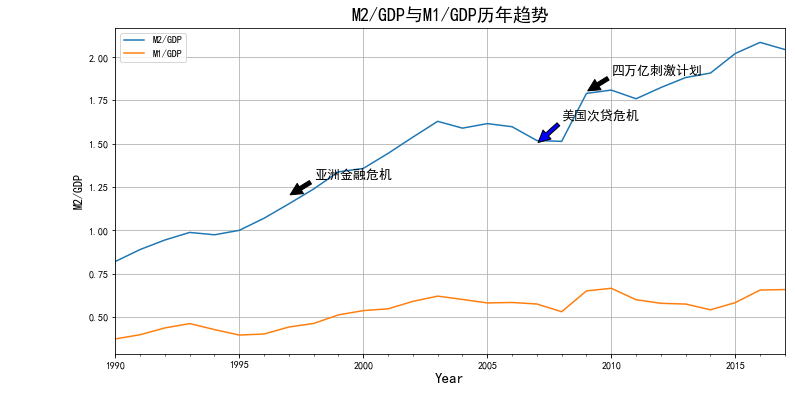

In [32]:
df[["M2/GDP", "M1/GDP"]].plot(figsize=(12, 6))
plt.xlabel('Year', size=15)
plt.ylabel('M2/GDP', size=12)
plt.title('M2/GDP与M1/GDP历年趋势', size=18)
plt.annotate('亚洲金融危机', size=13, xy=('1997-7-1', 1.2),
            xytext=('1998-1-1', 1.3), arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate('美国次贷危机', size=13, xy=('2007-8-1', 1.5),
            xytext=('2008-1-1', 1.64), arrowprops=dict(facecolor='blue', shrink=0.05))
plt.annotate('四万亿刺激计划', size=13, xy=('2009-1-1', 1.8),
            xytext=('2010-1-1', 1.9), arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate('金融去杠杆', size=13, xy=('2016-8-1', 12),
            xytext=('2017-1-1', 15), arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate('特朗普2千亿关税牌', size=13, xy=('2018-07-10', 2),
            xytext=('2018-08-10', 2.1), arrowprops=dict(facecolor='black', shrink=0.05))
plt.grid(True)

M2/GDP总体上曲折上升的，从1990年的不到90%到2017年的接近220%。2017年以来，尽管经济增长一直处于下行空间，但在金融杠杆的影响下，广义货币供应量持续下滑，导致M2/GDP出现下滑趋势。

很多“专家”会经常使用M2/GDP指标来解读经济质量、通胀和危机，认为M2越高，货币发行量越大，所以通胀越严重；M2/GDP越高，GDP增长需要M2越高，货币供给不足，GDP增速会下降。特别是当2009年后中国M2绝对值超过美国，更为各界诟病，普遍认为中国存在巨大的货币隐患，它可能导致通胀失控、产生泡沫甚至经济危机。

那么到底中国M2/GDP高企的本质是什么？成因何在？是不是导致中国通胀的根本原因？它对经济和金融系统稳定究竟有多大危害？这些都是值得进一步探讨的问题。

从现有文献来看，M2/GDP并不存在所谓的最优比例，而且由于种种客观原因，不同经济体之间并不具备可比性。尽管M2/GDP指标通常反映了金融机构发展在市场中的重要程度或者对于个人储蓄的贡献，但作为传统的金融深化指标，两者只在成熟金融系统中呈正相关趋势，在一个借贷受限制的不成熟市场中，两者往往反而是负相关趋势。Elhiraika研究指出M2/GDP对于金融深化的衡量可能并不贴切，因为M2/GDP畸高可能是金融市场不发达的讯号，而高度成熟的金融市场这一比例反而较低，因为后者通常持有与之经济相适应的货币量。Shunsuke Bando(1998)的分析中还注意到，对M2/GDP的分析必须结合M1/GDP这一比例，在M1/GDP稳定增长下的M2/GDP的增长才反映了亚洲经济体市场下金融机构提供相对长期的资金，如从家庭储蓄向工业部门的转移，但也须注意到，资本的非完全有效给这一分析带来的偏差，如资产泡沫、银行不良贷款的积淀等。并且，只有在扣除通货膨胀因素之后才能得到Marshallian K的真实增长率。

# GDP增速贡献
消费、投资、净出口三大需求对GDP增速的贡献率情况。

In [37]:
gdp_for = ts.get_gdp_for()
gdp_for_sorted = gdp_for.sort_values('year')
gdp_for_sorted.to_csv("gdp_for.csv")
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y')
df = pd.read_csv('gdp_for.csv', parse_dates=['year'], index_col='year', date_parser=dateparse)
df.rename(columns={'end_for': '消费贡献率', 'asset_for': '投资贡献率', 'goods_for': '净出口贡献率'}, inplace=True)
df.head()

,Unnamed: 0,消费贡献率,for_rate,投资贡献率,asset_rate,净出口贡献率,goods_rate
year,,,,,,,
1978-01-01,39,39.4,4.6,66.0,7.7,-5.4,-0.6
1979-01-01,38,87.3,6.6,15.4,1.2,-2.7,-0.2
1980-01-01,37,71.8,5.6,26.4,2.1,1.8,0.1
1981-01-01,36,93.4,4.9,-4.3,-0.2,10.9,0.5
1982-01-01,35,64.7,5.9,23.8,2.2,11.5,1.0


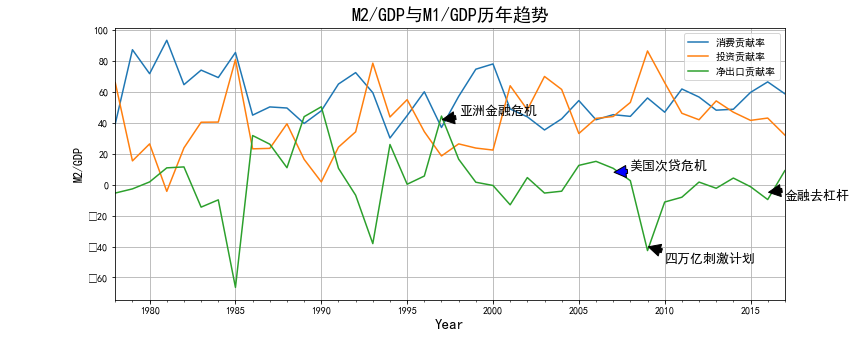

In [42]:
df[["消费贡献率", "投资贡献率", "净出口贡献率"]].plot(figsize=(12, 5))
plt.xlabel('Year', size=15)
plt.ylabel('M2/GDP', size=12)
plt.title('M2/GDP与M1/GDP历年趋势', size=18)
plt.annotate('亚洲金融危机', size=13, xy=('1997-7-1', 42),
            xytext=('1998-1-1', 45), arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate('美国次贷危机', size=13, xy=('2007-8-1', 8),
            xytext=('2008-1-1', 10), arrowprops=dict(facecolor='blue', shrink=0.05))
plt.annotate('四万亿刺激计划', size=13, xy=('2009-1-1', -40),
            xytext=('2010-1-1', -50), arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate('金融去杠杆', size=13, xy=('2016-8-1', -5),
            xytext=('2017-1-1', -10), arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate('特朗普2千亿关税牌', size=13, xy=('2018-07-10', 2),
            xytext=('2018-08-10', 2.1), arrowprops=dict(facecolor='black', shrink=0.05))
plt.grid(True)

这里发现发现一个有趣的现象，净出口贡献率大多时候是负的，但这并不意味着外贸在拖经济后腿。实际上，净出口贡献率这一概念只有统计意义，没有经济意义。用这个指标来衡量，会低估外贸对经济增长的贡献度。根据经济学理论，一国国内生产总值(GDP)可分解为总投资、总消费和净出口(包括货物出口及服务出口)三个部分。净出口是指出口额与进口额之差，净出口对经济增长的贡献率是指净出口增量与GDP增量之比，即：净出口对GDP增长的贡献率=净出口增量/GDP增量*100%

# 总结
对宏观经济问题的深入分析，得结合理论（逻辑）+历史（纵向比较）+统计（数据和jill）

最后再分享一个获取实时电影票房的数据

In [20]:
ts.realtime_boxoffice()

timed out
timed out


,BoxOffice,Irank,MovieName,boxPer,movieDay,sumBoxOffice,time
0,936.69,1,大黄蜂,41.74,9,60979.35,2019-01-12 13:14:03
1,344.32,2,命运之夜——天之杯：恶兆之花,15.34,2,1483.20,2019-01-12 13:14:03
2,247.10,3,“大”人物,11.01,3,5263.37,2019-01-12 13:14:03
3,189.76,4,白蛇：缘起,8.46,2,1648.67,2019-01-12 13:14:03
4,105.16,5,来电狂响,4.69,16,57736.91,2019-01-12 13:14:03
5,60.01,6,海王,2.67,37,197338.03,2019-01-12 13:14:03
6,52.93,7,养家之人,2.36,2,199.93,2019-01-12 13:14:03
7,47.27,8,蜘蛛侠：平行宇宙,2.11,23,41738.25,2019-01-12 13:14:03
8,40.81,9,德鲁大叔,1.82,2,280.34,2019-01-12 13:14:03
9,33.34,10,钢铁飞龙之奥特曼崛起,1.49,-5,33.34,2019-01-12 13:14:03
